# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(data.shape)
print(f"NaN values: {data.isna().sum().sum()}")
print(f"Duplicates: {data.duplicated().sum().sum()}")
print(data.info())

(5391, 6)
NaN values: 0
Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [5]:
data[["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]] = data[["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]].replace({'\$': '', ',': ''}, regex=True).apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [6]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [7]:
print(f"Average production budget: {data.USD_Production_Budget.mean().round(2)}")
print(f"Average worldwide gross revenue: {data.USD_Worldwide_Gross.mean().round(2)}")
print(f"Minimum -> worldwide gross: {data.USD_Worldwide_Gross.min()} // domestic gross: {data.USD_Domestic_Gross.min()}")


Average production budget: 31113737.58
Average worldwide gross revenue: 88855421.96
Minimum -> worldwide gross: 0 // domestic gross: 0


In [8]:
is_profitable = data.USD_Worldwide_Gross - data.USD_Production_Budget
is_profitable.sort_values(ascending=True).head(25)

5388   -175000000
5387   -160000000
5366   -127426868
4028   -110450242
5384   -103000000
5385   -100000000
1608    -94635231
1860    -92905005
5341    -79979111
5090    -75452340
2376    -73699549
830     -73482678
1443    -70896370
3796    -70371823
1583    -69590483
3778    -69533984
2285    -68088638
5309    -63318732
1292    -63301101
2472    -61583254
1154    -60376918
5058    -60000000
5338    -60000000
1038    -59158877
1693    -56403089
dtype: int64

In [9]:
print(f"Highest production budget film: {data.Movie_Title[data.USD_Production_Budget.idxmax()]}")
print(f"Highest worldwide gross film: {data.Movie_Title[data.USD_Worldwide_Gross.idxmax()]}")

Highest production budget film: Avatar
Highest worldwide gross film: Avatar


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [10]:
print(f"Grossed $0: {data.USD_Domestic_Gross[data.USD_Domestic_Gross == 0].count()}")
data['Loss'] = data['USD_Production_Budget'] - data['USD_Domestic_Gross']
highest_budget_loss = data.nlargest(5, 'Loss')[['Movie_Title', 'USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross', 'Loss']]
print(f"Highest budget but grossed domestically nothing: \n{highest_budget_loss.Movie_Title.values}")
highest_budget_loss

Grossed $0: 512
Highest budget but grossed domestically nothing: 
['John Carter' 'The Lone Ranger' 'Singularity' 'Aquaman'
 'Valerian and the City of a Thousand Planets']


,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Loss
4223,John Carter,275000000,282778100,73058679,201941321
4333,The Lone Ranger,275000000,260002115,89302115,185697885
5388,Singularity,175000000,0,0,175000000
5387,Aquaman,160000000,0,0,160000000
5366,Valerian and the City of a Thousand Planets,180000000,52573132,31023132,148976868


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [11]:
print(f"Grossed $0: {data.USD_Worldwide_Gross[data.USD_Worldwide_Gross == 0].count()}")

Grossed $0: 357


### Filtering on Multiple Conditions

In [12]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Loss
71,4310,1956-02-16,Carousel,3380000,3220,0,3380000
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,500000
1744,3695,2001-12-31,The Hole,7500000,10834406,0,7500000
2155,4236,2003-12-31,Nothing,4000000,63180,0,4000000
2203,2513,2004-03-31,The Touch,20000000,5918742,0,20000000


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [13]:
filtered_data = data.query("USD_Domestic_Gross == 0 & USD_Worldwide_Gross != 0")
print(f'Number of international releases: {len(international_releases)}')
filtered_data.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Loss
71,4310,1956-02-16,Carousel,3380000,3220,0,3380000
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,500000
1744,3695,2001-12-31,The Hole,7500000,10834406,0,7500000
2155,4236,2003-12-31,Nothing,4000000,63180,0,4000000
2203,2513,2004-03-31,The Touch,20000000,5918742,0,20000000


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [14]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [15]:
not_released_films = data.query(f"Release_Date >= @scrape_date")
not_released_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Loss
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,100000000
5386,2950,2018-10-08,Meg,15000000,0,0,15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,160000000
5388,96,2020-12-31,Singularity,175000000,0,0,175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,20000000


In [16]:
not_released_films.shape

(7, 7)

In [17]:
data_clean = data.drop(not_released_films.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [18]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0] * 100

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

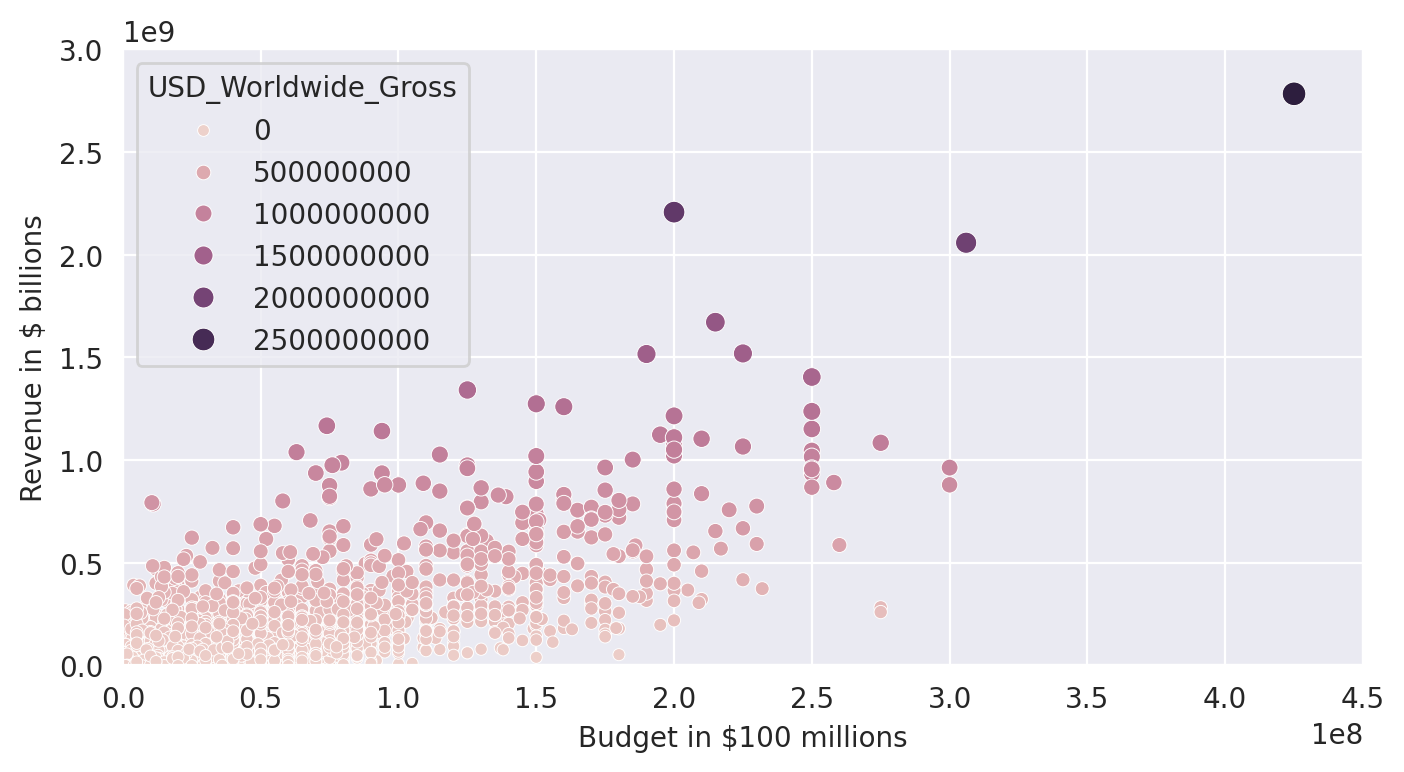

In [36]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



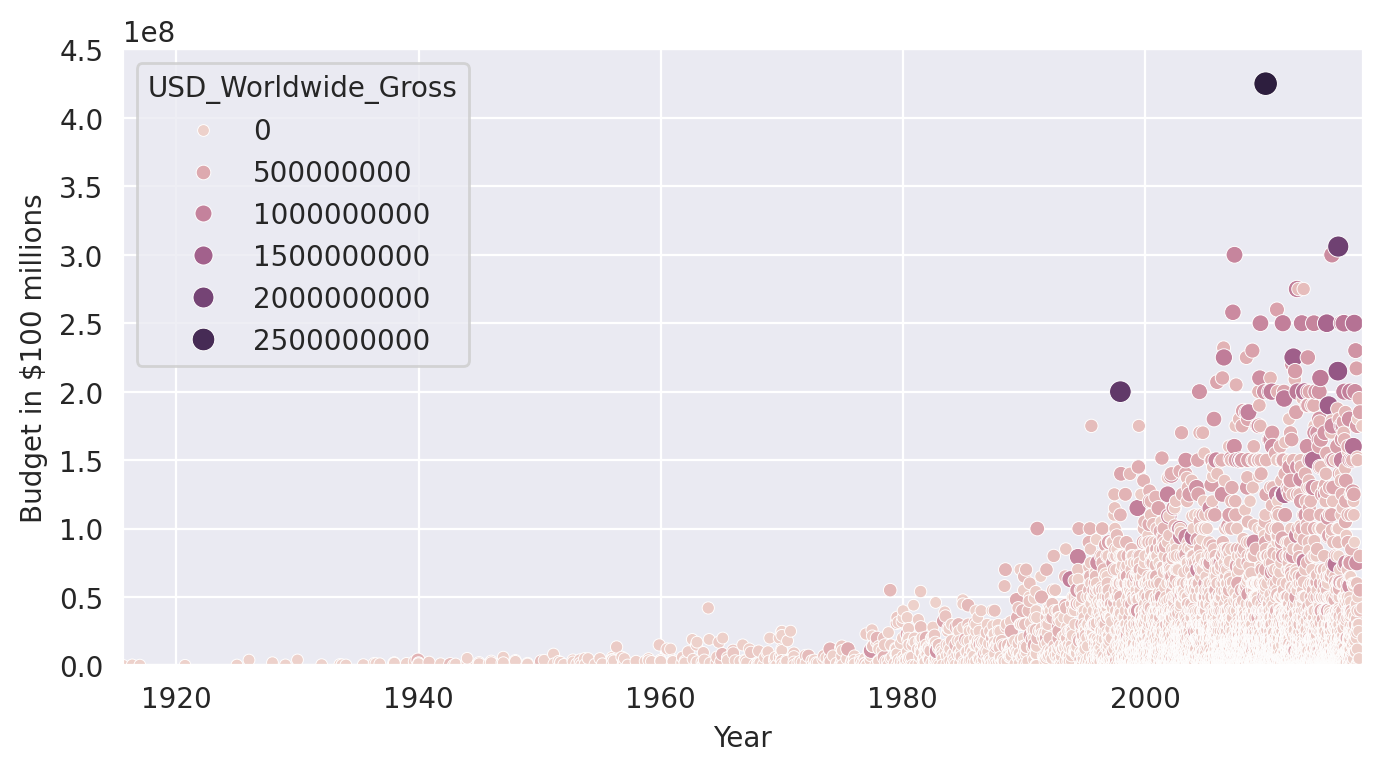

In [51]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                       x='Release_Date', 
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [70]:
date = pd.DatetimeIndex(data_clean.Release_Date)
year = date.year
decades = (year // 10) * 10
data_clean["Decade"] = decades
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Loss,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,-9890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,-7800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,-2900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,-10755000,1920
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,-52029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,16947188,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,135824934,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,-3850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [90]:
old_films = data_clean.query("Decade < 1970")
old_films.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Loss,Decade
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,-11678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,-96308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,-9208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,-14800000,1960
152,4195,1969-12-19,Topaz,4000000,6000000,6000000,-2000000,1960


In [91]:
new_films = data_clean.query("Decade >= 1970")
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Loss,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,25000000,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,17000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,-50500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,8800000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,-78100000,1970


In [92]:
print(f"Films released prior to 1970: {old_films.shape[0]}")
print(f"Most expensive film: {old_films.Movie_Title[old_films.USD_Production_Budget.idxmax()]}")

Films released prior to 1970: 153
Most expensive film: Cleopatra


# Seaborn Regression Plots

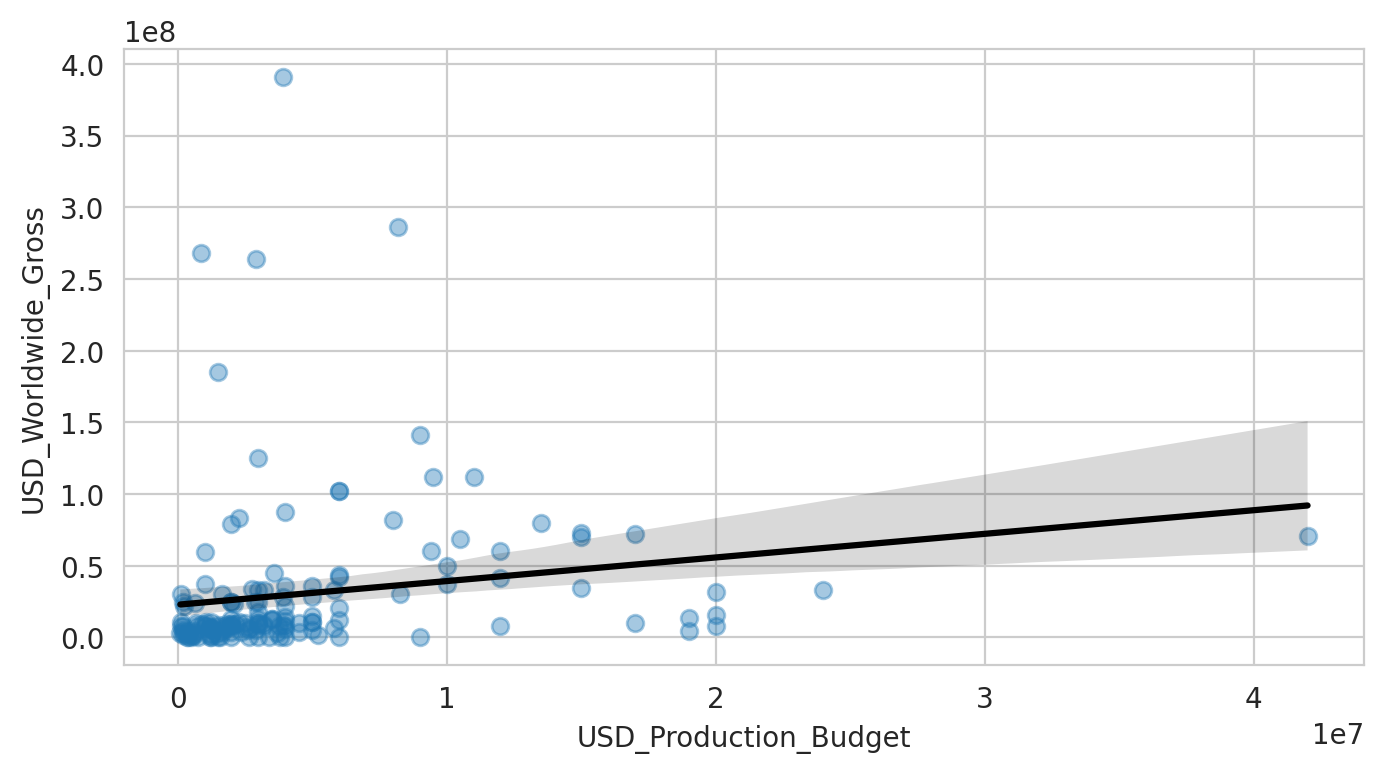

In [96]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

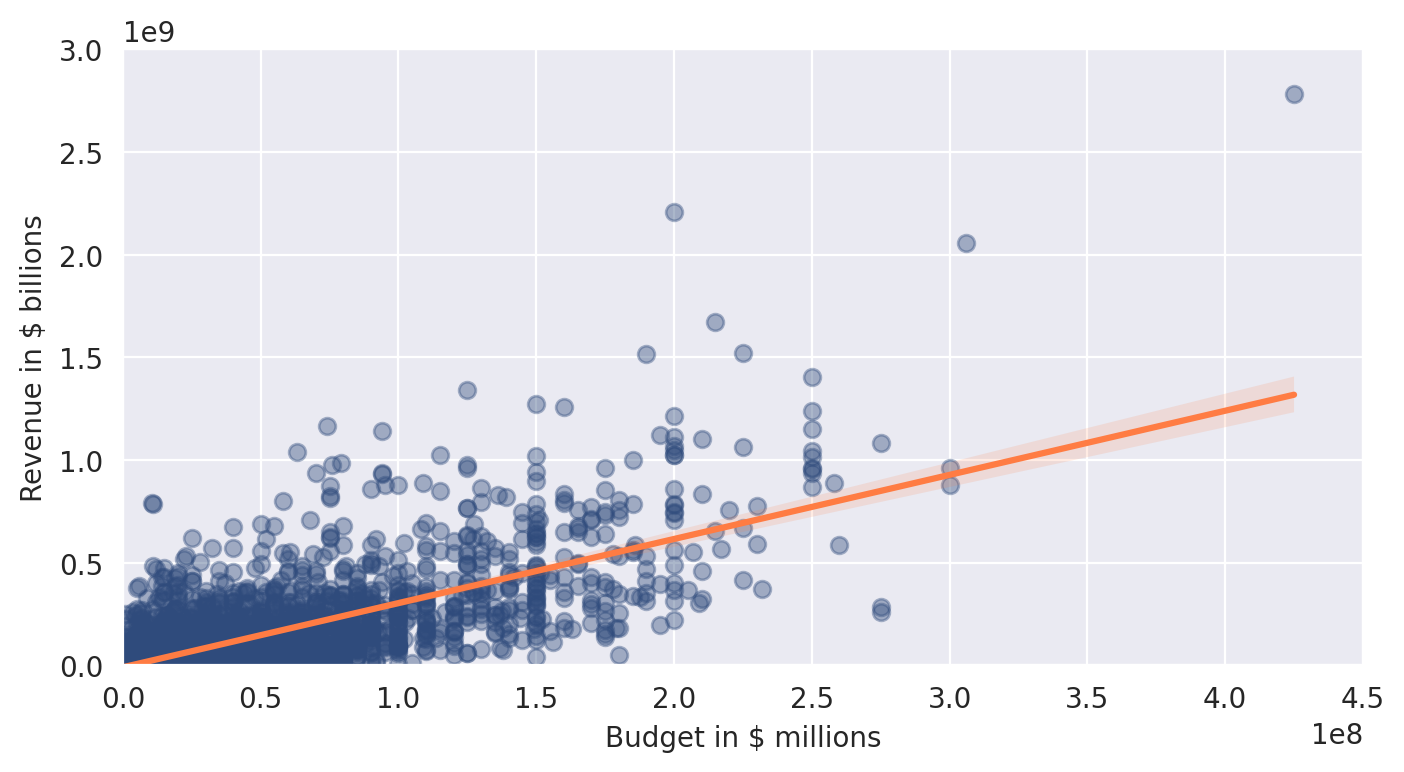

In [100]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': '#ff7c43'})
  ax.set(ylim=(0, 3000000000), 
         xlim=(0, 450000000),
         ylabel="Revenue in $ billions",
         xlabel="Budget in $ millions")
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [136]:
# Explanatory Variable(s) or Feature(s)
X_new = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y_new = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

new_films_regression = LinearRegression().fit(X_new,y_new)
print(f"Theta zero: {new_films_regression.intercept_}")
print(f"Theta one: {new_films_regression.coef_}")
new_films_regression.score(X_new,y_new)

Theta zero: [-8650768.00661042]
Theta one: [[3.12259592]]


0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [137]:
X_old = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
old_films_regression = LinearRegression().fit(X_old, y_old)
print(f"Theta zero: {old_films_regression.intercept_[0]}")
print(f"Theta one: {old_films_regression.coef_[0]}")
old_films_regression.score(X_old, y_old)

Theta zero: 22821538.635080386
Theta one: [1.64771314]


0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [138]:
budget = 350000000
revenue_old_estimate = (old_films_regression.intercept_[0] + old_films_regression.coef_[0, 0] * budget).round(2)
revenue_current_estimate = (new_films_regression.intercept_[0] + new_films_regression.coef_[0, 0] * budget).round(2)
print(f"The old estimated revenue for a $350 film is around ${revenue_old_estimate}")
print(f"The currrent estimated revenue for a $350 film is around ${revenue_current_estimate}")

The old estimated revenue for a $350 film is around $599521139.04
The currrent estimated revenue for a $350 film is around $1084257803.06
